In [1]:
import pandas as pd
# import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Read the data using the read_html method from the table "Коефіцієнт народжуваності в регіонах України (1950—2019)"
[LINK](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C)

In [2]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

#### Print the first rows of the table using the "head" method

In [3]:
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


#### Define the number of rows and columns in the dataframe ("shape" attribute)

In [4]:
print("The number of rows and columns:", df.shape)

The number of rows and columns: (28, 9)


#### Replace the value "-" in the table with the value NaN

In [5]:
df.replace("—", pd.NA, inplace=True)
# df.replace('—', np.nan, inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  <NA>  <NA>
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2  <NA>
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1  <NA>
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

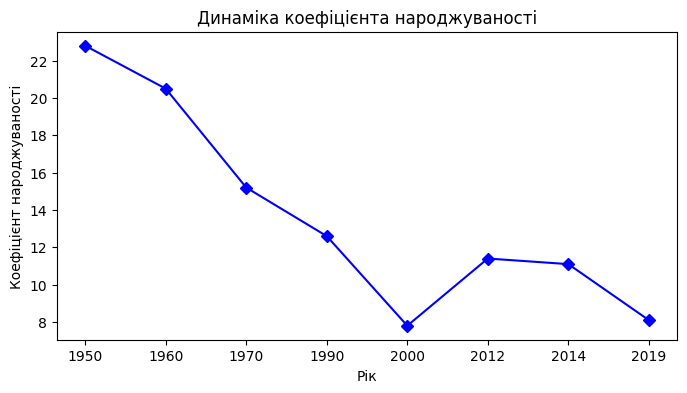

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(df.columns[1:], df.iloc[-1][1:], color='blue', marker="D")
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Динаміка коефіцієнта народжуваності')
plt.show()

#### Determine the types of all columns with "dataframe.dtypes"

In [7]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


#### Replace the non-numeric column types with numeric columns. This is the columns that contained the "-" symbol

In [8]:
df[['2014', '2019']] = df[['2014', '2019']].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


#### Calculate the proportion of blanks in each column (use the "isnull" and "sum" methods)

In [9]:
print(df.isnull().sum())
print(df.isnull().sum() / df.shape[0])

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


#### Delete the data for the whole country from the table (the last row of the table)

In [10]:
df.drop(df.index[-1], axis=0, inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

#### Replace missing data in columns with the average values of these columns ("fillna" method)

In [11]:
df = df.fillna(df.iloc[:, 1:].mean())
print(round(df, 2))

               Регіон  1950   1960  1970  1990  2000  2012   2014   2019
0                Крим  23.0  20.60  16.0  13.0   7.3  12.6  11.14   8.02
1           Вінницька  22.4  19.20  14.2  12.4   8.4  11.2  10.90   7.60
2           Волинська  24.7  25.00  17.9  15.3  11.2  14.8  14.10  10.10
3    Дніпропетровська  20.4  20.40  15.1  12.3   7.1  11.2  11.10   7.10
4            Донецька  27.1  21.40  14.0  10.9   6.1   9.8   8.20   8.02
5         Житомирська  26.1  22.30  15.9  12.9   8.9  12.2  12.00   7.90
6        Закарпатська  31.4  27.30  20.7  16.8  11.5  15.1  14.60  10.40
7          Запорізька  21.9  19.70  15.0  12.4   7.1  10.6  10.60   6.80
8   Івано-Франківська  24.3  24.80  18.2  15.5  10.3  12.4  12.20   8.80
9            Київська  20.4  18.90  15.6  12.3   7.3  12.2  12.10   8.00
10     Кіровоградська  21.6  17.10  14.5  12.6   7.9  11.0  10.80   6.80
11          Луганська  26.2  23.50  14.4  11.6   6.2   9.6   5.10   8.02
12          Львівська  23.4  24.00  17.1  14.0   9.

#### Get a list of regions where the birth rate in 2019 was higher than the average in Ukraine

In [12]:
country_birth_rate = df["2019"].mean()
print(country_birth_rate)
regions_higher_than_ukraine = df[(df["2019"]) > country_birth_rate]
print(regions_higher_than_ukraine["Регіон"])

8.017391304347827
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


#### Which region had the highest birth rate in 2014?

In [13]:
print(df.loc[df['2014'].idxmax(), 'Регіон'])

Рівненська


#### Draw a bar chart of the birth rate by region in 2019

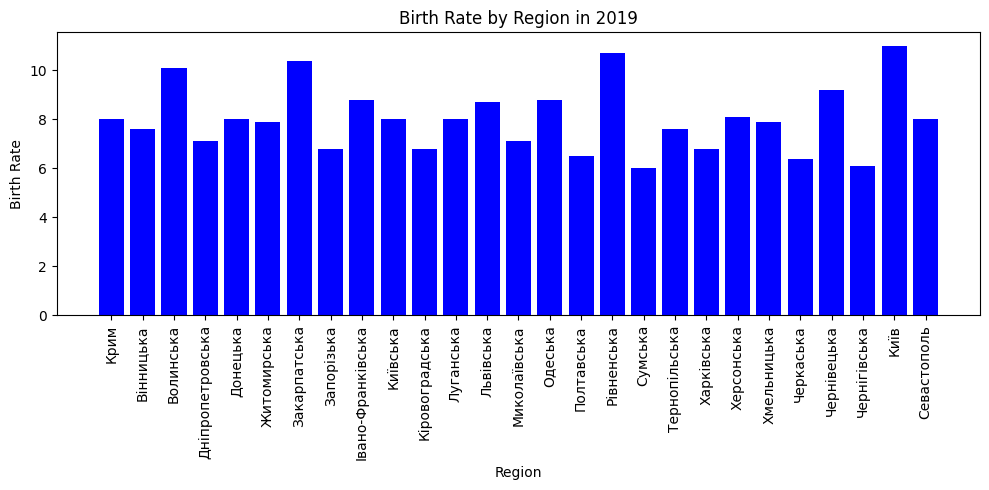

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(df["Регіон"], df["2019"], color='blue')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.title('Birth Rate by Region in 2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()